In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import save_image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Use Sigmoid for final layer to get output in range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Model, Loss Function, Optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 20
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)
        
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished!")


Epoch [1/20], Loss: 0.0512
Epoch [2/20], Loss: 0.0402
Epoch [3/20], Loss: 0.0464
Epoch [4/20], Loss: 0.0387
Epoch [5/20], Loss: 0.0334
Epoch [6/20], Loss: 0.0401
Epoch [7/20], Loss: 0.0352
Epoch [8/20], Loss: 0.0341
Epoch [9/20], Loss: 0.0338
Epoch [10/20], Loss: 0.0264
Epoch [11/20], Loss: 0.0322
Epoch [12/20], Loss: 0.0328
Epoch [13/20], Loss: 0.0309
Epoch [14/20], Loss: 0.0343


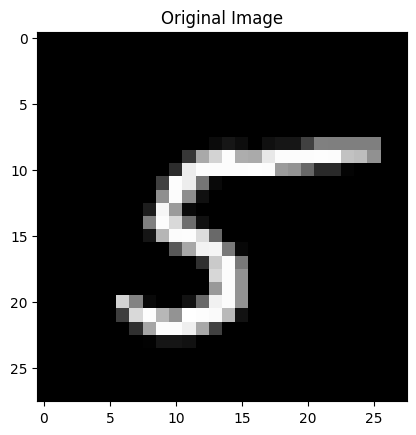

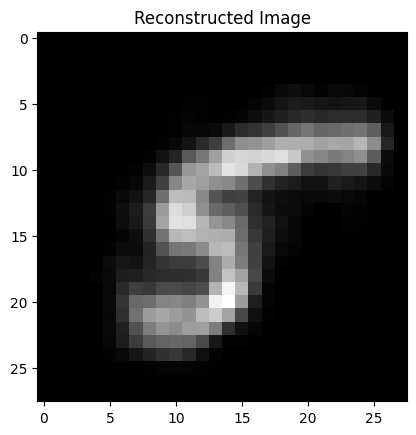

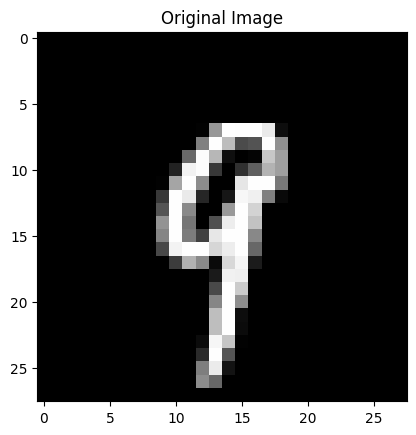

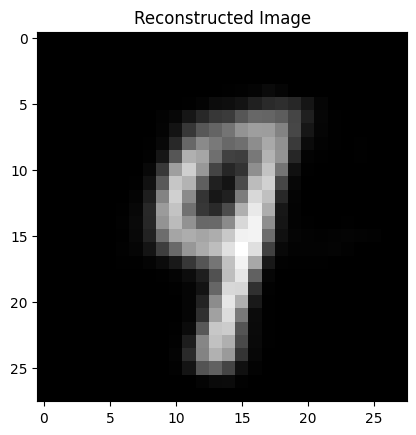

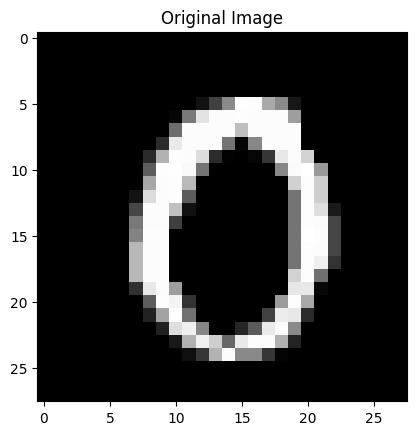

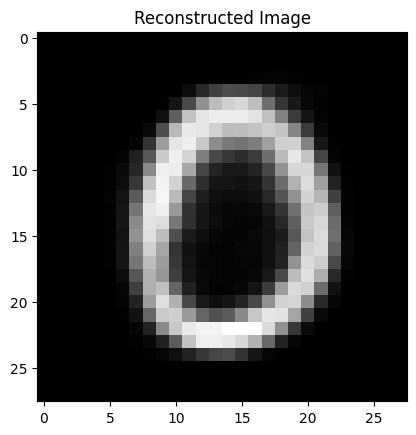

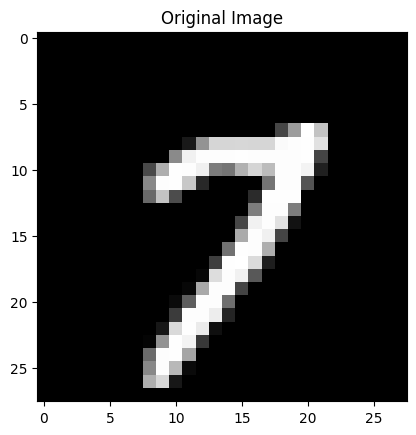

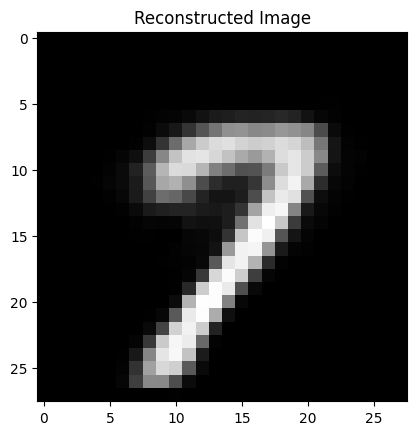

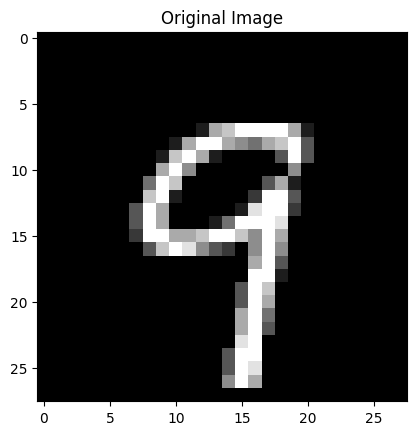

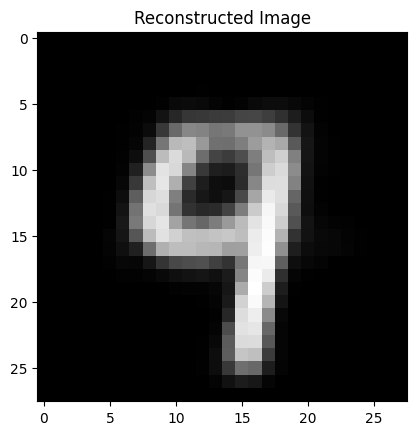

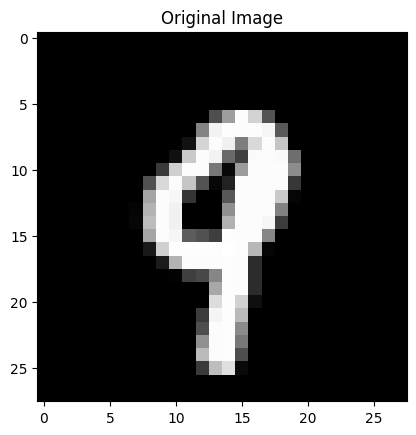

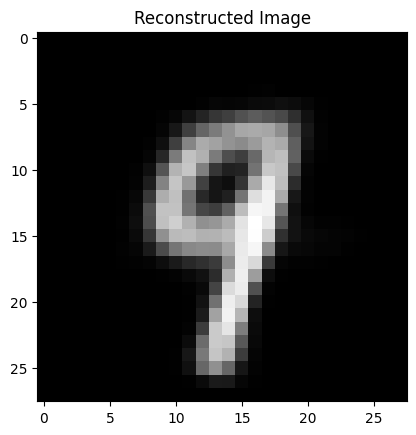

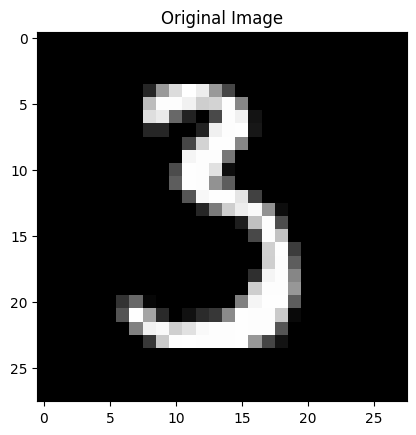

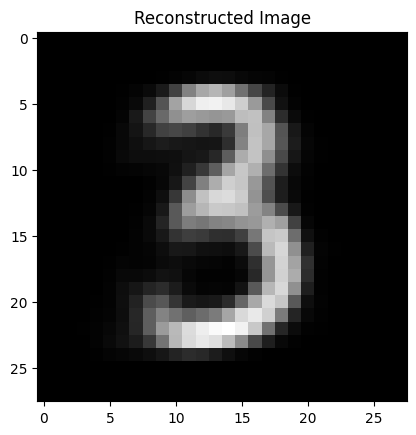

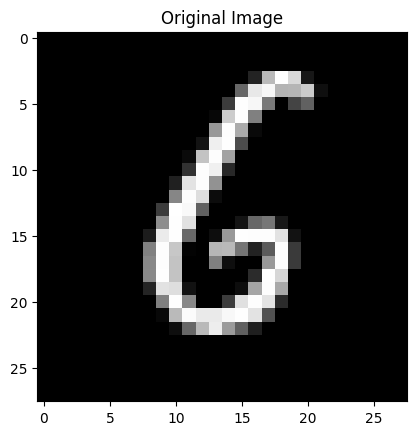

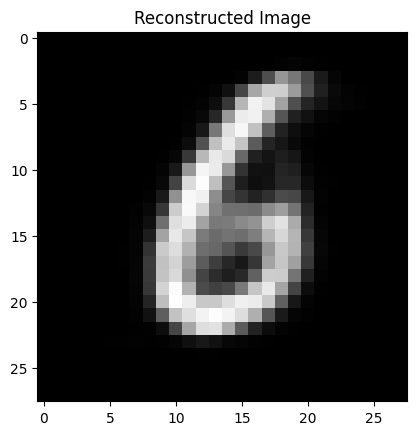

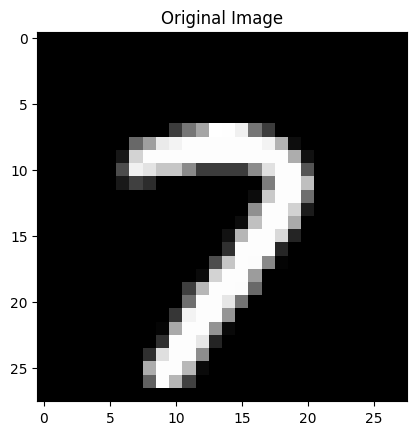

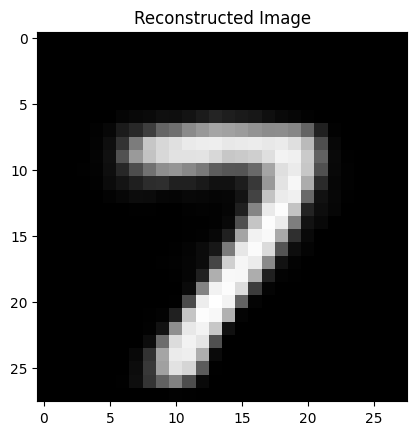

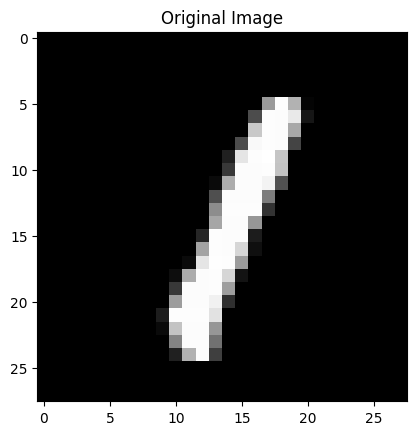

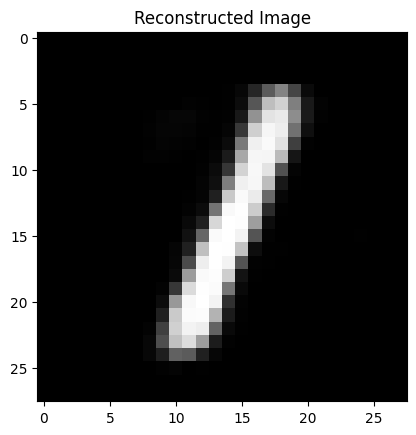

In [10]:

# Create directory to save images if it doesn't exist
os.makedirs('images/mnist', exist_ok=True)

# Get some test images
images, _ = next(iter(test_loader))
images = images.to(device)

# Forward pass through the autoencoder
output = model(images)

# Function to show images
def imshow(img, title):
    img = img.cpu()  # Move the tensor to CPU
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.title(title)
    plt.show()

# Display and save original and reconstructed images
for i in range(len(images)):
    # Original images
    imshow(images[i].view(28, 28), title='Original Image')
    save_image(images[i].view(1, 28, 28), f'images/mnist/original_{i}.png')
    
    # Reconstructed images
    imshow(output[i].view(28, 28).detach(), title='Reconstructed Image')
    save_image(output[i].view(1, 28, 28).detach(), f'images/mnist/reconstructed_{i}.png')


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import save_image

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Autoencoder definition
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # Use Sigmoid for final layer to get output in range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Model, Loss Function, Optimizer
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create directory to save images if it doesn't exist
os.makedirs('images/mnist/progress', exist_ok=True)

# Pick one instance for monitoring progress
monitor_image, _ = next(iter(test_loader))
monitor_image = monitor_image[0].to(device).unsqueeze(0)  # Get a single image and add batch dimension
save_image(monitor_image.view(1, 28, 28), 'images/mnist/progress/ref_image.png')

losses = []

# Training Loop
num_epochs = 20
num_saves_per_epoch = 5
for epoch in range(num_epochs):
    batch_count = len(train_loader)
    save_interval = batch_count // num_saves_per_epoch
    
    for batch_idx, data in enumerate(train_loader):
        img, _ = data
        img = img.to(device)
        
        # Forward pass
        output = model(img)
        loss = criterion(output, img)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Save the monitor image at regular intervals
        if (batch_idx + 1) % save_interval == 0 or (batch_idx + 1) == batch_count:
            save_number = (batch_idx + 1) // save_interval 
            losses.append(loss.item())  
            with torch.no_grad():
                output_monitor = model(monitor_image)
                save_image(output_monitor.view(1, 28, 28), f'images/mnist/progress/epoch_{epoch+1}_{save_number}.png')
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training finished!")


Epoch [1/20], Loss: 0.0467
Epoch [2/20], Loss: 0.0449
Epoch [3/20], Loss: 0.0371
Epoch [4/20], Loss: 0.0361
Epoch [5/20], Loss: 0.0368
Epoch [6/20], Loss: 0.0348
Epoch [7/20], Loss: 0.0366
Epoch [8/20], Loss: 0.0353
Epoch [9/20], Loss: 0.0315
Epoch [10/20], Loss: 0.0412
Epoch [11/20], Loss: 0.0351
Epoch [12/20], Loss: 0.0340
Epoch [13/20], Loss: 0.0377
Epoch [14/20], Loss: 0.0385
Epoch [15/20], Loss: 0.0354
Epoch [16/20], Loss: 0.0347
Epoch [17/20], Loss: 0.0317
Epoch [18/20], Loss: 0.0316
Epoch [19/20], Loss: 0.0294
Epoch [20/20], Loss: 0.0293
Training finished!


In [16]:
print(losses)
losses = np.array(losses)
np.save('values/losses.npy', losses)

[0.05988536 0.05531101 0.05129484 0.04463442 0.0450881  0.04667767
 0.04441112 0.04330262 0.04162715 0.04221341 0.03898435 0.04489409
 0.03868217 0.04241891 0.03776577 0.04313453 0.03794156 0.03711418
 0.04053539 0.04176923 0.04044622 0.03911547 0.03447388 0.03606141
 0.03598313 0.03563509 0.03532933 0.04035757 0.03358059 0.03675009
 0.03498048 0.03609647 0.03390448 0.04000561 0.03530528 0.03476812
 0.03817936 0.03206109 0.03506718 0.03501415 0.03762151 0.03660763
 0.03576143 0.03393538 0.03727949 0.03269801 0.03221886 0.035326
 0.03269497 0.03254714 0.03684927 0.03493592 0.03876852 0.03151105
 0.03463263 0.03246999 0.0368111  0.03168068 0.03368806 0.04118776
 0.03021546 0.0360695  0.03297938 0.03336799 0.0356392  0.03509354
 0.03552104 0.03160512 0.03142169 0.03112802 0.03087493 0.03395397
 0.03515805 0.03062999 0.02864177 0.03104181 0.03114117 0.03771899
 0.03678179 0.03096527 0.03165146 0.03699494 0.03426525 0.03848221
 0.03636963 0.03143071 0.03788413 0.03391294 0.03408382 0.035438

In [17]:
print(min(losses), max(losses))

0.028641773387789726 0.05988536402583122
